# Logistic Regression Mini-project
### Derek Lilienthal

The purpose of this project is to use Logistic Regression to predict heart disease given 13 predictor variables. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics
from itertools import permutations 
from itertools import combinations
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (20.0, 10.0)

### Read the data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/grbruns/cst383/master/heart.csv")
df['output'] = df['output'] - 1

# Initial Exploration

The following is the information about the dataset from https://archive.ics.uci.edu/ml/datasets/Statlog+(Heart)

In [3]:
# How much data?
print("There is {} many rows and {} many columns".format(df.shape[0], df.shape[1]))

There is 270 many rows and 14 many columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        270 non-null    int64  
 1   sex        270 non-null    int64  
 2   chestpain  270 non-null    int64  
 3   restbp     270 non-null    int64  
 4   chol       270 non-null    int64  
 5   sugar      270 non-null    int64  
 6   ecg        270 non-null    int64  
 7   maxhr      270 non-null    int64  
 8   angina     270 non-null    int64  
 9   dep        270 non-null    float64
 10  exercise   270 non-null    int64  
 11  fluor      270 non-null    int64  
 12  thal       270 non-null    int64  
 13  output     270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


Every column is either an integer of or a floating point. Regardless, it's all numeric data

In [5]:
df.describe()

,age,sex,chestpain,restbp,chol,sugar,ecg,maxhr,angina,dep,exercise,fluor,thal,output
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


Basic Summary Statistics

### How much NA values?

In [6]:
df.isna().sum()

age          0
sex          0
chestpain    0
restbp       0
chol         0
sugar        0
ecg          0
maxhr        0
angina       0
dep          0
exercise     0
fluor        0
thal         0
output       0
dtype: int64

There is no null data

### How much bad data?

For looking at bad data, i decided the best way to approach this was to plot each variable as a bar plot to expose any outliers that may need to be delt with.

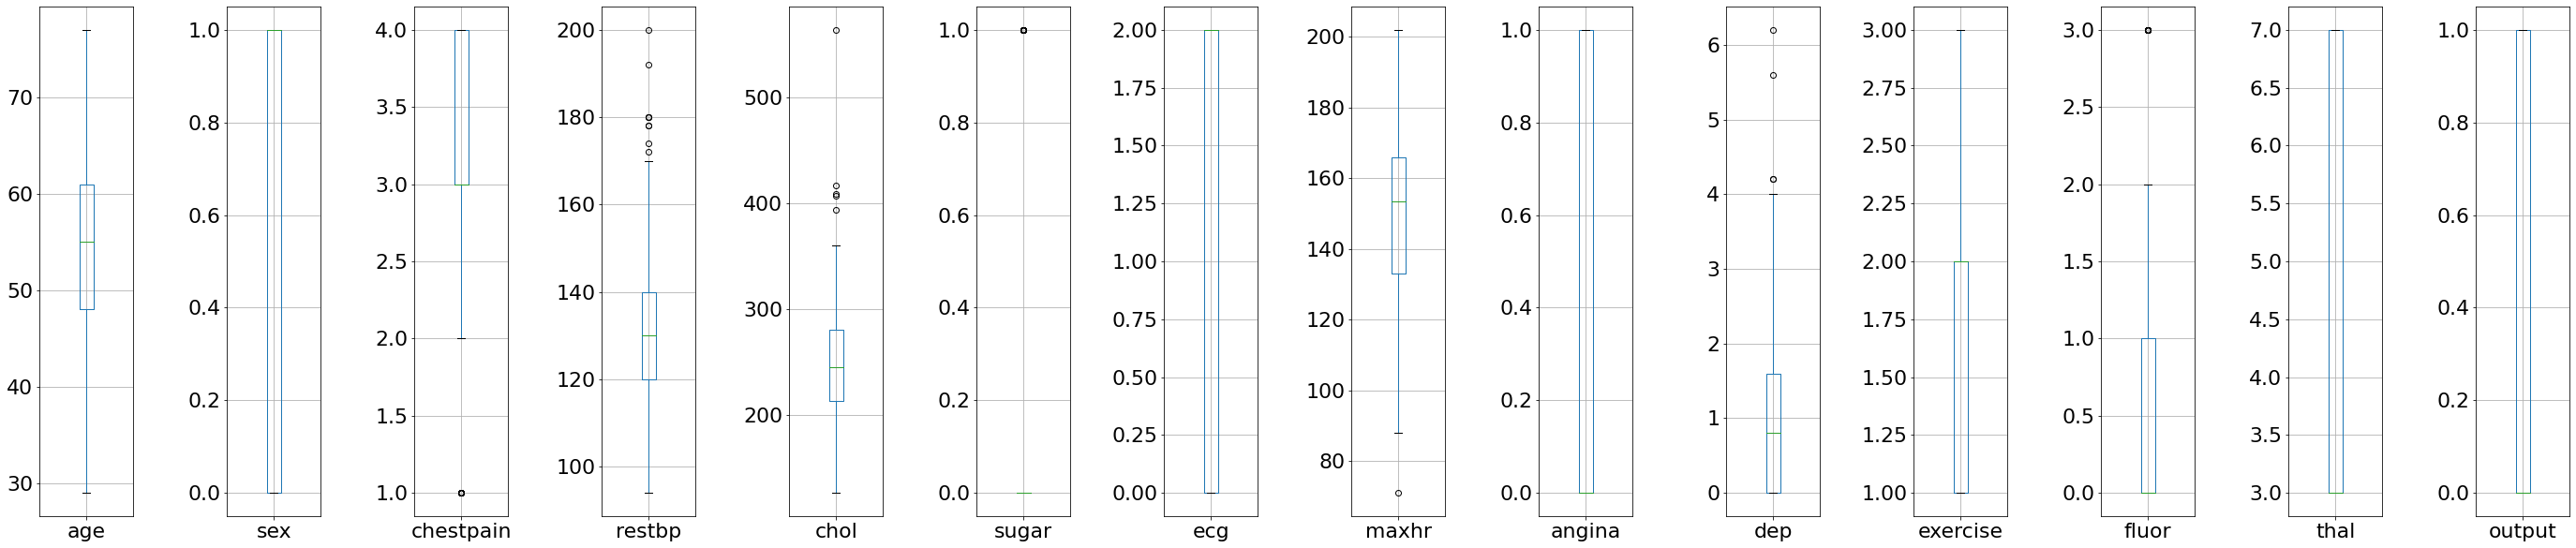

In [7]:
plt.subplots_adjust(wspace=1, hspace=1, right=2)
i = 1
for col in df.columns:
    plt.subplot(1, len(df.columns), i)
    df.boxplot([col])
    i += 1

It looks like there are some outliers in chestpain, restdp, chol, maxhr, dep, abd flour. Because the dataset is relatively small (270 observations), i don't belive getting rid of the outliers would be benificial because it may alter the true accuracy of the model.

# Initial preprocessing, Exploration, and visualization

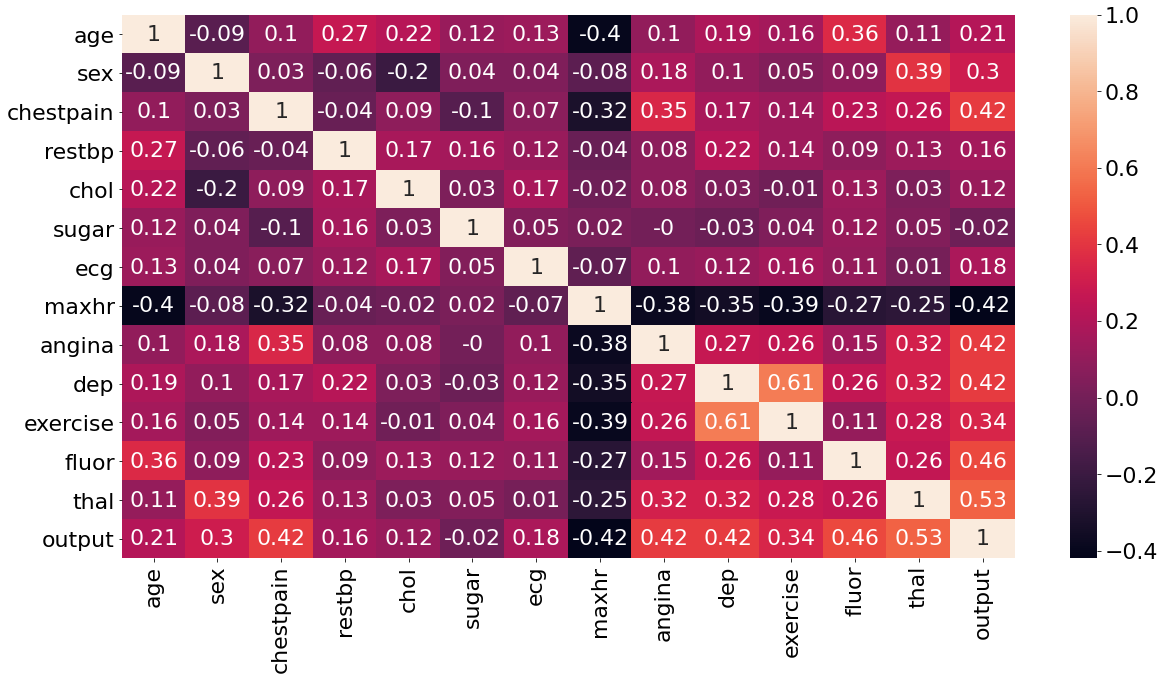

In [8]:
# Take a look to see if there is any strong correlations we can find
corrMatrix = round(df.corr(),2)
sns.heatmap(corrMatrix, annot=True);

###### Positive Correlations
I decided that a positive correlation i would further investigate would be 0.4 or greater. 

It looks like there is some noticeable positive correlation between:

Output -> chestpain, angina, dep, fluor, thal

Excercise -> dep

###### Negative Correlations
For negative correlations, i decided my cuttoff value would be -0.4

It looks like the noticeable negative correlations are:

Output -> maxhr

Maxhr -> age

###### Next, i created a histogram of all the variables to explore the distribution of data for each variable

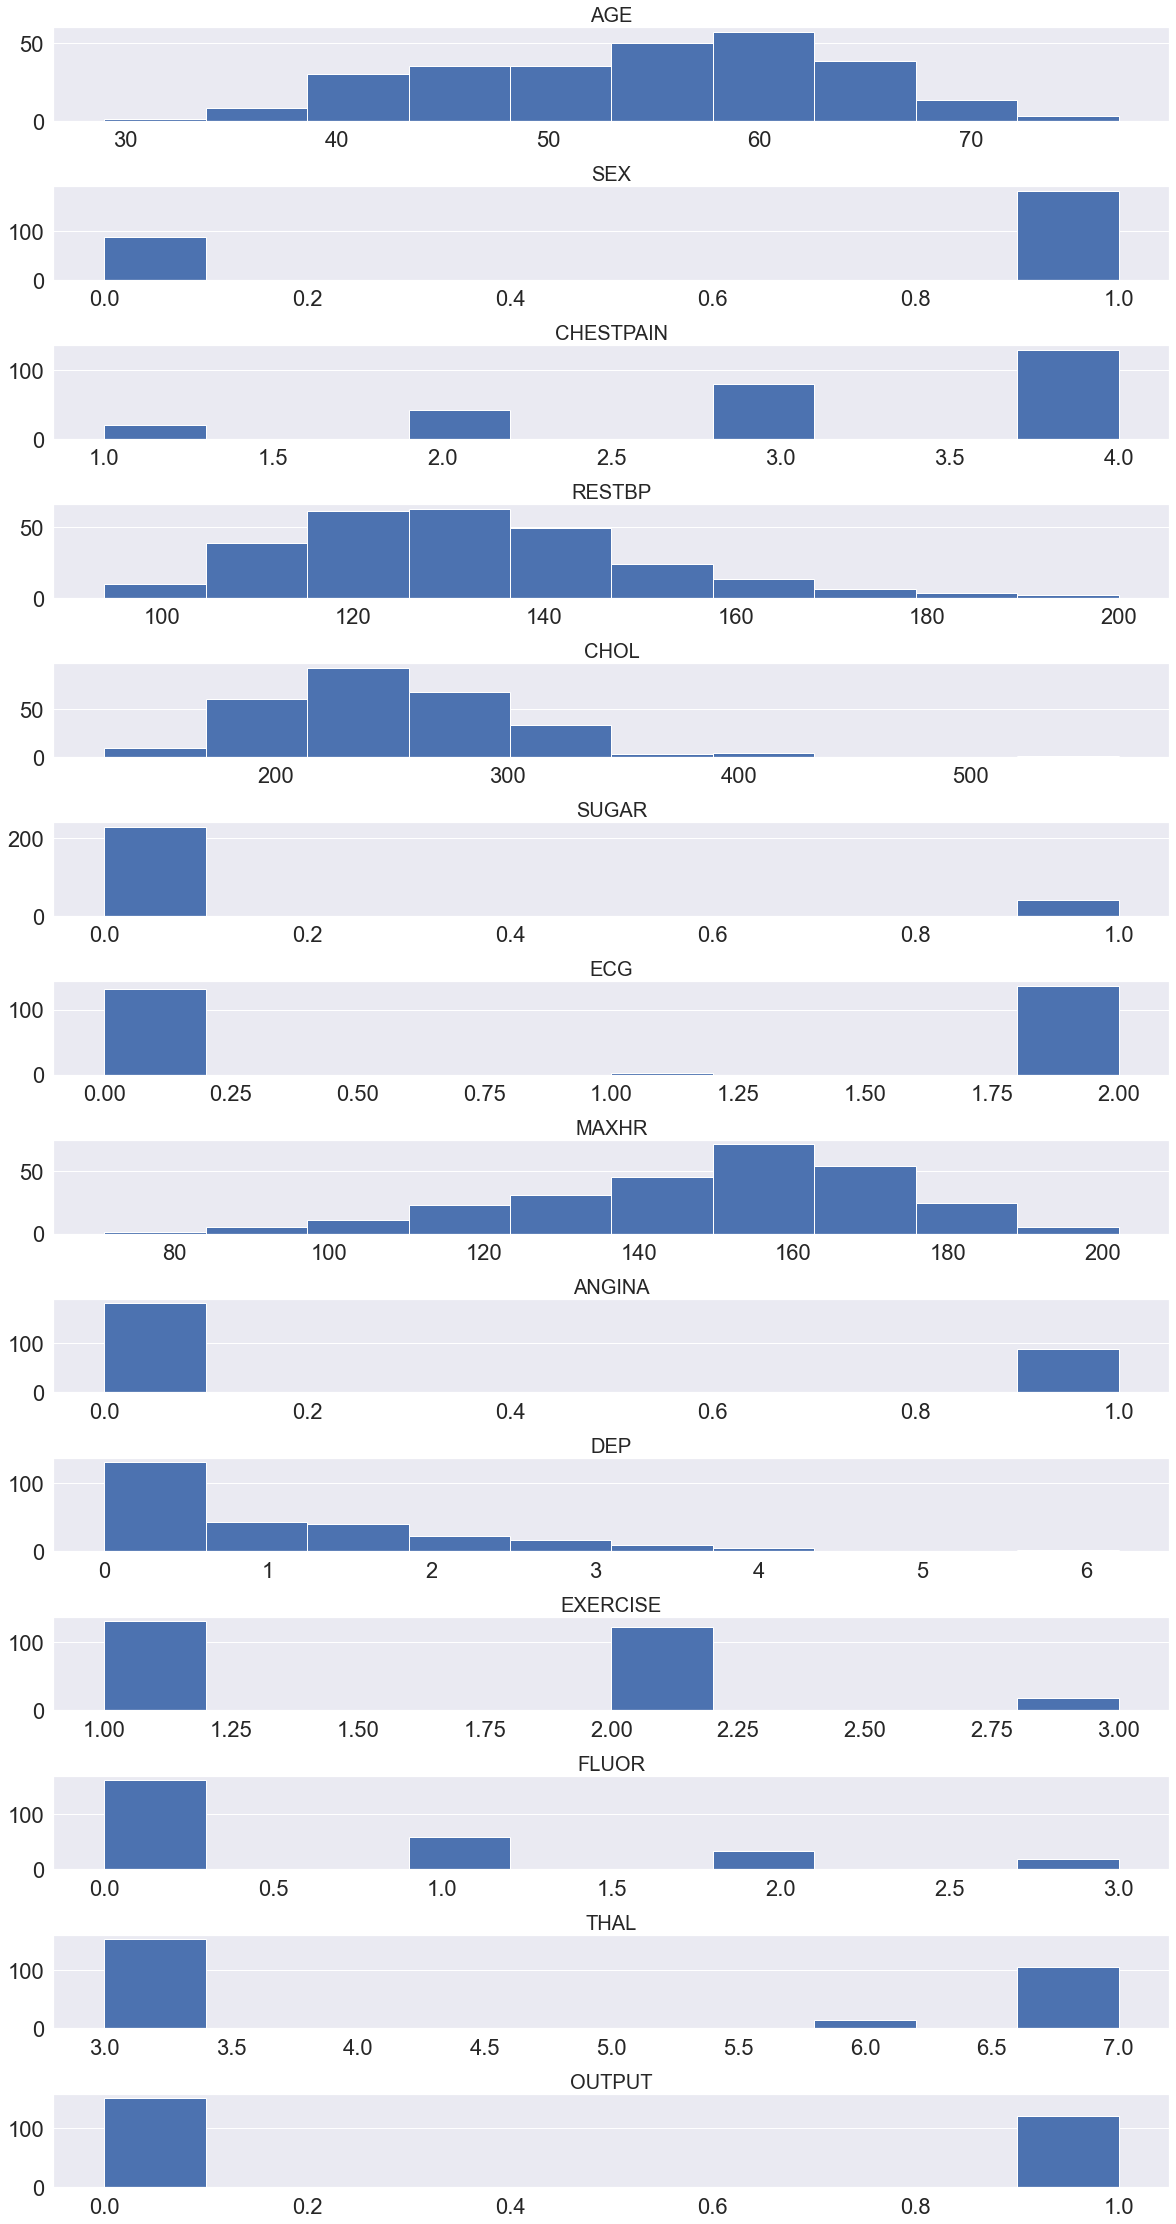

In [29]:
i = 1
plt.figure(figsize=(20,10))
for col in df.columns:
    plt.subplot(len(df.columns), 1, i)
    plt.hist(df[col])
    plt.title(col.upper(), fontsize=20)
    plt.grid(axis='x')
    i += 1
plt.subplots_adjust(hspace=0.7, wspace=0.5, top=5, bottom=2);

From the exploration of all these graphs, it looks like the columns, SEX, CHESTPAIN, SUGAR, ECG, ANGINA, EXERCISE, FLUOR, THAL, and OUTPUT all are categorical but represented using numeric values

We can confirm this theory by printing out how many unqiue values are in column

In [10]:
for col in df.columns:
    print("The column {} has \t{} unique values".format(col.upper(), df[col].value_counts().count()))

The column AGE has 	41 unique values
The column SEX has 	2 unique values
The column CHESTPAIN has 	4 unique values
The column RESTBP has 	47 unique values
The column CHOL has 	144 unique values
The column SUGAR has 	2 unique values
The column ECG has 	3 unique values
The column MAXHR has 	90 unique values
The column ANGINA has 	2 unique values
The column DEP has 	39 unique values
The column EXERCISE has 	3 unique values
The column FLUOR has 	4 unique values
The column THAL has 	3 unique values
The column OUTPUT has 	2 unique values


The columns that are categorical data are: 
###### SEX, CHESTPAIN, SUGAR, ECG, ANGINA, EXCERSISE, FLOUR, THAL, and OUTPUT


The columns that are numeric are: 
###### AGE, RESTBP, CHOL, MAXHR, and DEP

# Final preprocessing and cleaning

We are going to convert the categorical data into dummy variables

In [11]:
# We need to convert the categorical data that is already represented as an integer 
# to an object in order for the dummy variables to work. We are only applying this 
# to categorical variables that have more than two values

# Create a new dataframe with all the dummy variables
df2 = df
df2['chestpain'] = df2['chestpain'].astype(object)
df2['ecg'] = df2['ecg'].astype(object)
df2['exercise'] = df2['exercise'].astype(object)
df2['fluor'] = df2['fluor'].astype(object)
df2['thal'] = df2['thal'].astype(object)

df2 = pd.get_dummies(df2, drop_first=True)
df2.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          270 non-null    int64  
 1   sex          270 non-null    int64  
 2   restbp       270 non-null    int64  
 3   chol         270 non-null    int64  
 4   sugar        270 non-null    int64  
 5   maxhr        270 non-null    int64  
 6   angina       270 non-null    int64  
 7   dep          270 non-null    float64
 8   output       270 non-null    int64  
 9   chestpain_2  270 non-null    uint8  
 10  chestpain_3  270 non-null    uint8  
 11  chestpain_4  270 non-null    uint8  
 12  ecg_1        270 non-null    uint8  
 13  ecg_2        270 non-null    uint8  
 14  exercise_2   270 non-null    uint8  
 15  exercise_3   270 non-null    uint8  
 16  fluor_1      270 non-null    uint8  
 17  fluor_2      270 non-null    uint8  
 18  fluor_3      270 non-null    uint8  
 19  thal_6  

In [12]:
# Re-arrange the columns to having the output as the last column in order for out next graph to be more helpful
new_col = ['age','sex','restbp','chol','sugar','maxhr','angina','dep','chestpain_2','chestpain_3','chestpain_4','ecg_1','ecg_2','exercise_2','exercise_3','fluor_1','fluor_2','fluor_3','thal_6','thal_7','output']
df2 = df2[new_col]
df2.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          270 non-null    int64  
 1   sex          270 non-null    int64  
 2   restbp       270 non-null    int64  
 3   chol         270 non-null    int64  
 4   sugar        270 non-null    int64  
 5   maxhr        270 non-null    int64  
 6   angina       270 non-null    int64  
 7   dep          270 non-null    float64
 8   chestpain_2  270 non-null    uint8  
 9   chestpain_3  270 non-null    uint8  
 10  chestpain_4  270 non-null    uint8  
 11  ecg_1        270 non-null    uint8  
 12  ecg_2        270 non-null    uint8  
 13  exercise_2   270 non-null    uint8  
 14  exercise_3   270 non-null    uint8  
 15  fluor_1      270 non-null    uint8  
 16  fluor_2      270 non-null    uint8  
 17  fluor_3      270 non-null    uint8  
 18  thal_6       270 non-null    uint8  
 19  thal_7  

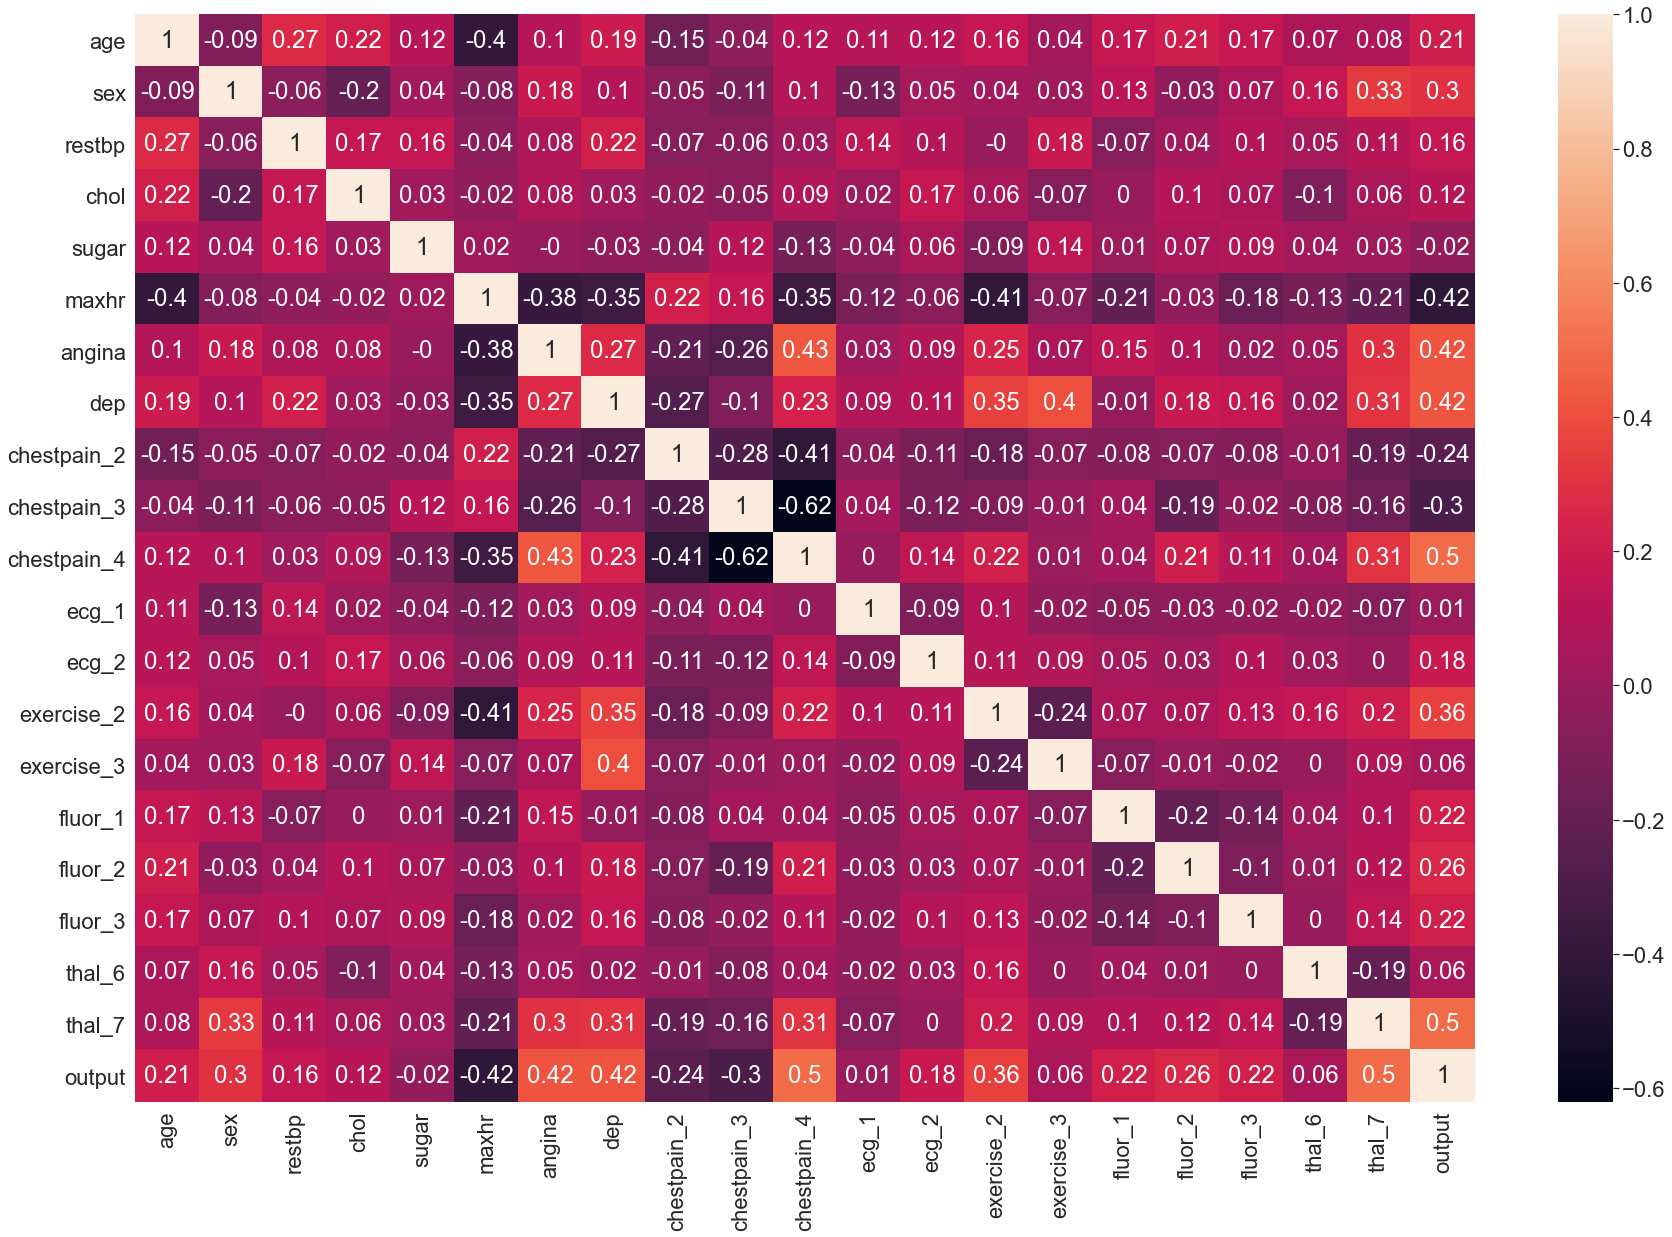

In [13]:
# Take a look to see if there is any new strong correlations we can find
sns.set(rc={'figure.figsize':(30,20)},font_scale=2)
corrMatrix = round(df2.corr(),2)
sns.heatmap(corrMatrix, annot=True);

I am going to drop the columns with the lowest correlations with the output. 

In [14]:
df2.drop(['sugar','restbp', 'chol', 'ecg_1', 'exercise_3', 'thal_6'], axis=1, inplace=True)

The columns now with the strongest positive correlations with output are:
###### angina, dep, chestpain_4, exercise_2, and thal_7
The columns with the strongest negative correlations with output are:
###### maxhr and chestpain_3

These will serve as a starting point for our predictions

# Machine learning

In [15]:
# We will use the variables with the strongest positive correlations for our predictors of heart disease
predictors = ['angina', 'dep', 'chestpain_4', 'exercise_2', 'thal_7']

In [16]:
# Create a function to test different predictors and targets

def logisticRegressionMetrics(dataframe, predictors, target, threshold=0.5, scaled=True):
    """ 
    This function takes the: 
    dataframe, 
    the predictors, 
    target variable, 
    probability threshold, 
    and the option to scale the data
    
    This function returns the: 
    predictor columns, 
    the accuracy of the predictions, 
    the precision,
    the recall,
    the True Positive Rate (TPR),
    the False Positive Rate (FPR),
    and the false negatives 
    """
    
    # Split the data 75% train, 25% test
    X_train, X_test, y_train, y_test = train_test_split(dataframe[predictors], dataframe[target], test_size=0.25, random_state=0)
    # Create a logisticRegression Object
    reg = LogisticRegression()
    
    # If we choose to scale the data
    if (scaled):
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    
    # Train the data
    reg.fit(X_train, y_train)
    # Make predictions
    predictions = reg.predict(X_test)

    # Create probabilities
    prob_heart_disease = reg.predict_proba(X_test)[:,1]
    predicts = (prob_heart_disease > threshold).astype(int)
    cm = confusion_matrix(y_test, predicts)
    
    # Create the precision and recall
    if (cm[0,1] + cm[1,1]) == 0:
        precision = 0
    else:
        precision = cm[1,1] / (cm[0,1] + cm[1,1])
    if (cm[1,0] + cm[1,1]) == 0:
        recall = 0
    else:
        recall = cm[1,1] / (cm[1,0] + cm[1,1])
    false_negative = cm[1,0]
    
    # Create the True Positive Rate and False Positive Rate
    if (cm[1,1] + cm[1,0]) == 0:
        TPR = 0
    else:      
        TPR = cm[1,1] / (cm[1,1] + cm[1,0])
    if (cm[0,0] + cm[0,1]) == 0:
        FPR = 0
    else:
        FPR = cm[0,1] / (cm[0,0] + cm[0,1])
    
    # Test the accuracy of the model
    accuracy = (cm[0,0] + cm[1,1]) / (cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1])
    
    return dataframe[predictors].columns, round(accuracy * 100,2), precision, recall, TPR, FPR, false_negative

In [17]:
# Test the function to see if it works
columns, accuracy, pre, rec, tpr, fpr, fn = logisticRegressionMetrics(df2, predictors, 'output', threshold=0.5, scaled=True)
print("Columns: {}\nAccuracy: {}%\nPrecision: {}\nRecall: {}\nTrue Positive Rate: {}\nFalse Positive Rate: {}\nNumber of False Negatives: {}".format(", ".join(columns), accuracy, pre, rec, tpr, fpr, fn))

Columns: angina, dep, chestpain_4, exercise_2, thal_7
Accuracy: 73.53%
Precision: 0.65625
Recall: 0.75
True Positive Rate: 0.75
False Positive Rate: 0.275
Number of False Negatives: 7


Now that we have a function that can calculate a lot of different metrics we may want to look at, we can now easier experiment with changing the predictors and the threshold to see which values gives us the best recall, precision, and least amount of false negatives. 

In [18]:
precision_scores = []
recall_scores = []
accuracy_scores = []
tpr_scores = []
fpr_scores = []
fn_scores = []

# Loop through the range of 0.01 to 0.99 of a threshold
for i in range(1,100):
    columns, accuracy, pre, rec, tpr, fpr, fn = logisticRegressionMetrics(df2, predictors, 'output', threshold=(i/100), scaled=True)
    accuracy_scores.append(accuracy)
    precision_scores.append(pre)
    recall_scores.append(rec)
    tpr_scores.append(tpr)
    fpr_scores.append(fpr)
    fn_scores.append(fn)

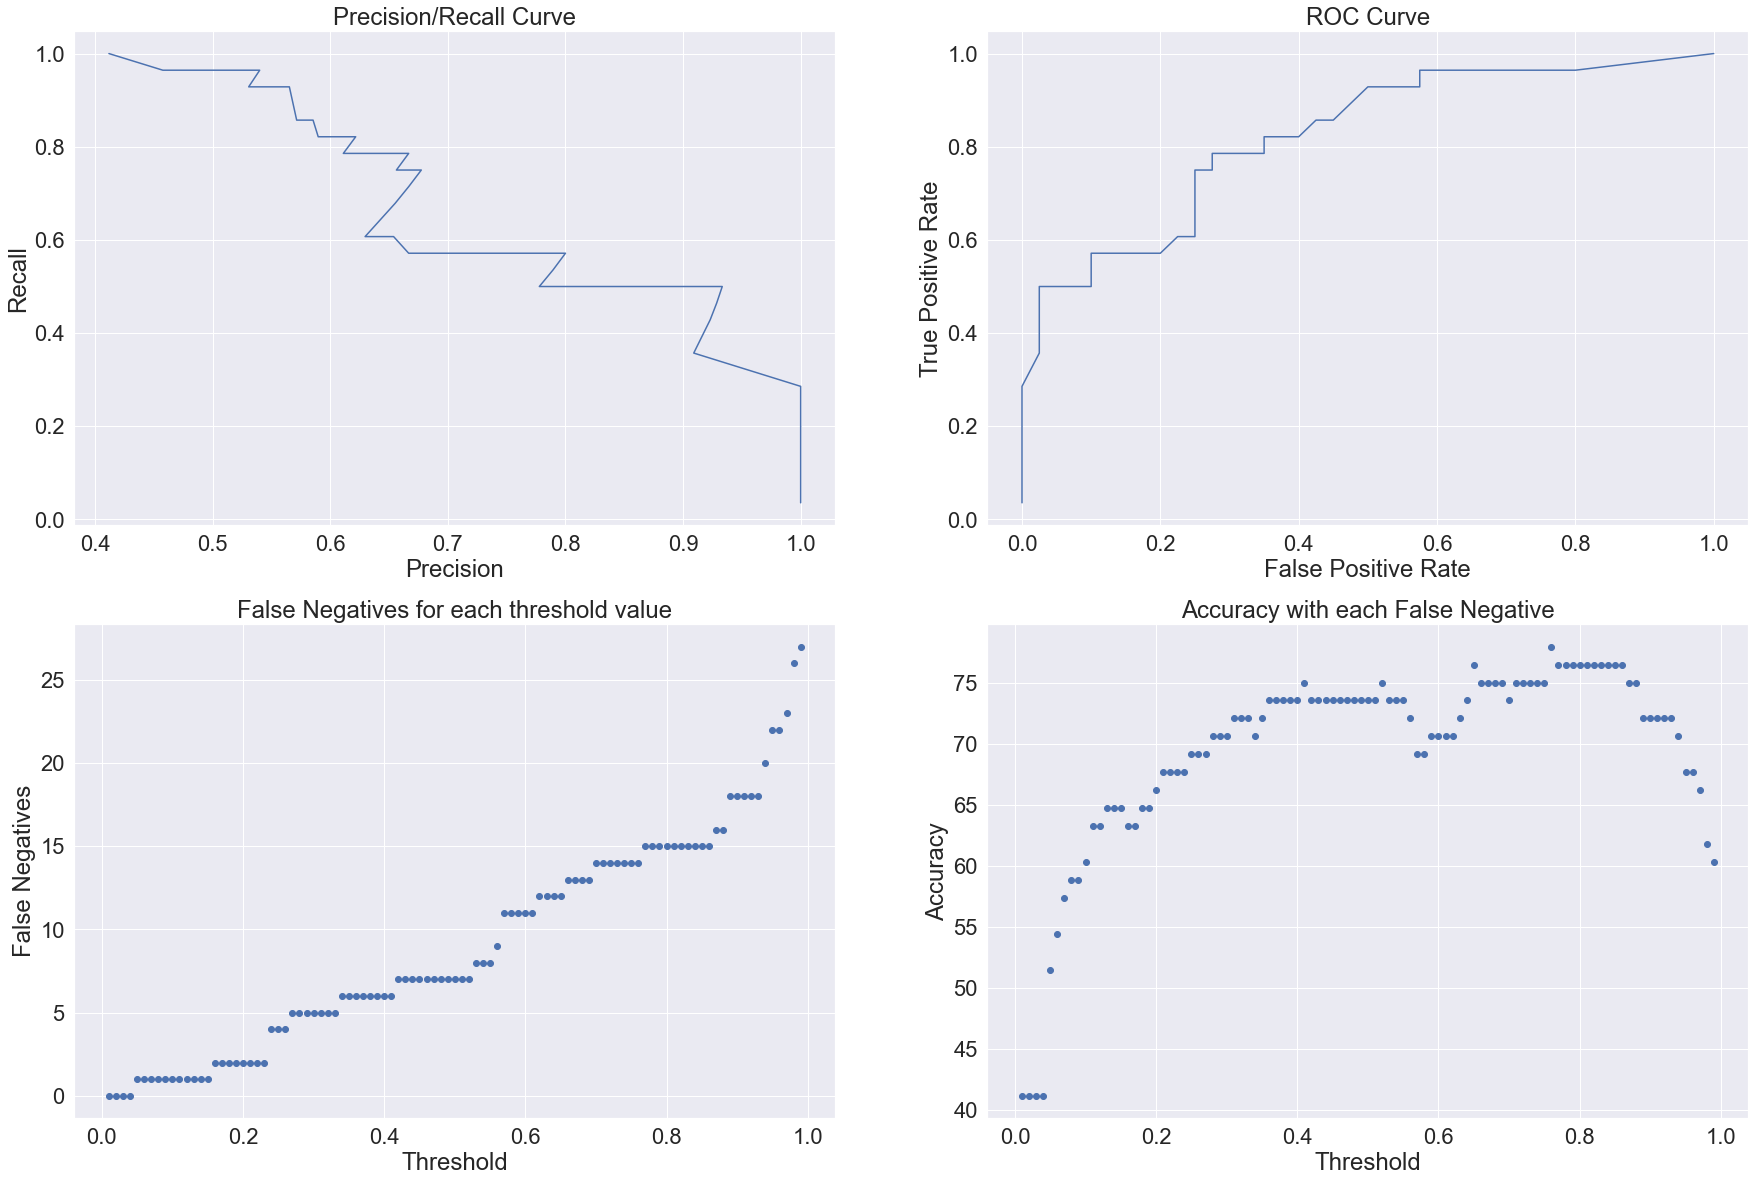

In [19]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(precision_scores, recall_scores)
#axs[0, 0].plot_surface(precision_scores, recall_scores, np.arange(1,100)/100)
axs[0, 0].set_title('Precision/Recall Curve')
axs[0, 0].set_ylabel('Recall')
axs[0, 0].set_xlabel('Precision')
axs[0, 1].plot(fpr_scores, tpr_scores)
axs[0, 1].set_title('ROC Curve')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_xlabel('False Positive Rate')
axs[1, 0].scatter((np.arange(1,100)/100), fn_scores)
axs[1, 0].set_title('False Negatives for each threshold value')
axs[1, 0].set_ylabel('False Negatives')
axs[1, 0].set_xlabel('Threshold')
axs[1, 1].scatter((np.arange(1,100)/100), accuracy_scores)
axs[1, 1].set_title('Accuracy with each False Negative')
axs[1, 1].set_xlabel('Threshold')
axs[1, 1].set_ylabel('Accuracy');

From the top left plot, we can see that in order for us to get high precision, we need to have a lower recall. And in order for us to have high recall, we're going to have a low precision. 

From the top right plot, we can see our model is not perfect when it comes to distinguishing between having heart disease and not heart disease.

From the bottom left plot, we can see that as the threshold increases, so does our false positives (having heart disease but was told you don't). 

The botton right plot shows us that as the threshold increases, the accurracy goes up to a certain point, but if the threshold is too high, then the accuracy will start to drop

Now lets try to find the set of variables that are most accurate for every given threshold point

In [20]:
# Create a function that creates a powerset of all the given variables in a list

# Code from https://coderbyte.com/algorithm/print-all-subsets-given-set
def powerSet(l):
    newlist = [[]]
    for i in range(1,len(l)+1):
        c = combinations(l,i)
        for i in c:
            newlist.append(list(i))
    return newlist

In [21]:
# Re-write a similar function and taking out things we don't need in order to improve speed
def logisticRegressionMetrics2(dataframe, predictors, target, threshold=0.5, scaled=True):
    """ 
    This function takes the: 
    dataframe, 
    the predictors, 
    target variable, 
    probability threshold, 
    and the option to scale the data
    
    This function returns the: 
    predictor columns and the accuracy of the predictions, 
    """
    
    # Split the data 75% train, 25% test
    X_train, X_test, y_train, y_test = train_test_split(dataframe[predictors], dataframe[target], test_size=0.25, random_state=0)
    # Create a logisticRegression Object
    reg = LogisticRegression()
    
    # If we choose to scale the data
    if (scaled):
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    
    # Train the data
    reg.fit(X_train, y_train)
    # Make predictions
    predictions = reg.predict(X_test)

    # Create probabilities
    prob_heart_disease = reg.predict_proba(X_test)[:,1]
    predicts = (prob_heart_disease > threshold).astype(int)
    cm = confusion_matrix(y_test, predicts)
    
    # Test the accuracy of the model
    accuracy = (cm[0,0] + cm[1,1]) / (cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1])
    
    return dataframe[predictors].columns, round(accuracy * 100,2)

In [22]:
# Create a function that gives us the variabels with the most accuracy by generating a powerset of all possible combinations

def mostAccurate(df, col, threshold=0.5, scale_data=True):
    sets = powerSet(col)
    max_score = 0
    best_columns = ""
    for i in sets[1:]:
        #print("These are the predictor variables: {}".format(" ".join(i)))
        columns, accuracy = logisticRegressionMetrics2(df, i, 'output', threshold=threshold, scaled=scale_data)
        if max_score < accuracy:
            max_score = accuracy
            best_columns = " ".join(i)
    #print("\nVariables: {} \nAccuracy {}%".format(best_columns, max_score))
    return best_columns, max_score, threshold

In [31]:
columns = []
max_scores = []
thresholds = []

# Loop through the range of 0.01 to 0.99 threshold
for i in range(1,100):
    col, max_, thresh = mostAccurate(df2, predictors, threshold=(i/100), scale_data=True)
    columns.append(col)
    max_scores.append(max_)
    thresholds.append(thresh)

index = max_scores.index(max(max_scores))
print("These are the columns: {}\nThe threshold: {}\nThe max accuracy: {}%".format(columns[index], thresholds[index], max_scores[index]))

These are the columns: dep exercise_2 thal_7
The threshold: 0.78
The max accuracy: 83.82%


Based on a brute-force permutations and powersets of all possible combinations of our predictor variables, we have found that in order for our model to be the most accurate, we need to use:

Columns: dep, exercise_2, and thal_7

Threshold: 0.78 (78%)

###### Lets now check to see if we use all the variables in the dataset, if we get a different result

In [24]:
# Uncomment if you want to see what every possible combination answer looks like. I let this run for 30 mins and it still wasn't done.
"""
predictors = df2.columns.values[df2.columns.values != "output"]
predictors.tolist()

columns = []
max_scores = []
thresholds = []

for i in range(1,100):
    col, max_, thresh = mostAccurate(df2, predictors, threshold=(i/100), scale_data=True)
    columns.append(col)
    max_scores.append(max_)
    thresholds.append(thresh)

index = max_scores.index(max(max_scores))
print("These are the columns: {}\nThe threshold: {}\nThe max accuracy: {}".format(columns[index], thresholds[index], max_scores[index]))

""";

This method of using brute-force to find the perfect predictors is very very resource and time consuming. Because there are 14 variables we are looking at, we have to compute 16384 (2^14) different sets of variables. And then for each set of variables, we are applying a threshold from 0.01 to 0.99 (99 different thresholds). So without using some sort of feature selecting algorith, we are creating 1,622,016 logistic regression models and comparing all of the features against each other to find which features are the best. 

###### Lets find the threshold and variables to give us the lowest possible false negative

In [30]:
columns_list = []
precision_scores = []
recall_scores = []
accuracy_scores = []
tpr_scores = []
fpr_scores = []
fn_scores = []
threshold_list = []

# Loop through the range of 0.01 to 0.99 of a threshold
for i in range(1,100):
    columns, accuracy, pre, rec, tpr, fpr, fn = logisticRegressionMetrics(df2, predictors, 'output', threshold=(i/100), scaled=True)
    columns_list.append(columns)
    accuracy_scores.append(accuracy)
    precision_scores.append(pre)
    recall_scores.append(rec)
    tpr_scores.append(tpr)
    fpr_scores.append(fpr)
    fn_scores.append(fn)
    threshold_list.append(i/100)
    
# Get the index of the lowest False Negative Score
index = fn_scores.index(min(fn_scores))

col = columns_list[index]
acc = accuracy_scores[index]
thresh = threshold_list[index]
perc = precision_scores[index]
tpr = tpr_scores[index]
fpr = fpr_scores[index]
recall = recall_scores[index]
fn = fn_scores[index]

print("These are the columns: {}\nThe Accuracy: {}%\nThe threshold: {}\nThe Precision Scores: {:.2f}%\nThe Recall: {}\nThe TPR: {}\nThe FPR: {}\nThe False Positive Score: {}".format(", ".join(col), acc, thresh, perc*100, recall, tpr, fpr, fn))

These are the columns: angina, dep, chestpain_4, exercise_2, thal_7
The Accuracy: 41.18%
The threshold: 0.01
The Precision Scores: 41.18%
The Recall: 1.0
The TPR: 1.0
The FPR: 1.0
The False Positive Score: 0


As we can see, we can achive a perfect 0 with false positives (not predicting heart disease when you actually have it), but our accuracy and precision will be awful. 

# Conclusion

Even though we found the columns and threshold for the best accuracy in predicted heart disease, high accuracy should not be the only factor in determining what our model should use. In the case of predicting heart disease, we should consider how many false negatives we want to allow in our calculations. 

The false negative meaning, telling someone they don't have heart disease when really they do. This is a Type II Error. Because lowering Type II Errors means increasing the Type 1 error (in our case would be telling someone they have heart disease when they actually don't), we need to consider a balance. 